In [45]:
import numpy as np
from skimage import io, feature, segmentation, filters, color, morphology
import matplotlib.pyplot as plt

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


NameError: name 'image' is not defined

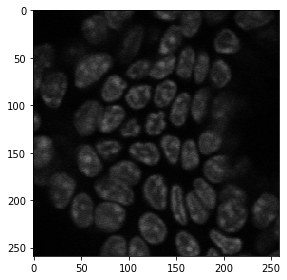

In [7]:
stack = io.imread(
    '/Users/dobrik4ever/Library/CloudStorage/OneDrive-Personal/Documents/Study/winter_21-22/Master Thesis/4 Raw data/17H-1.tif'
)

img = stack[18]
io.imshow(img)
img = img_as_float(image)


SLIC number of segments: 476


TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 720x720 with 0 Axes>

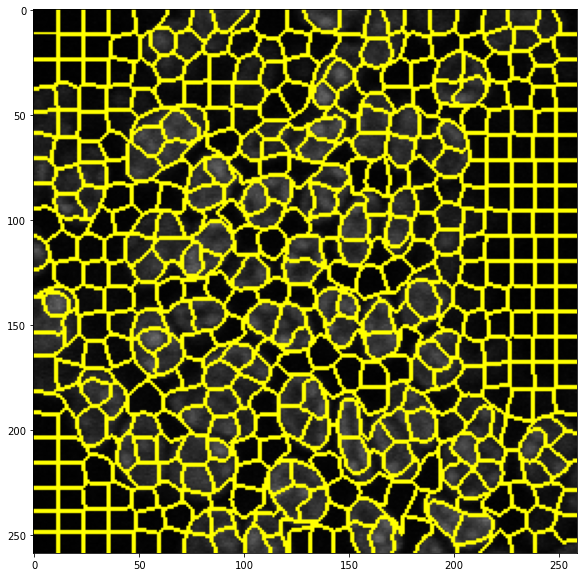

In [107]:
plt.figure(figsize=(10, 10))
disc = morphology.disk(1)
fimg = img# - morphology.white_tophat(img, disc)
segments_slic = segmentation.slic(fimg, n_segments=500, compactness=0.09, sigma=2, start_label=0)
print(f'SLIC number of segments: {len(np.unique(segments_slic))}')
plt.figure(figsize=(10, 10))
plt.imshow(segmentation.mark_boundaries(img, segments_slic))
plt.scatter(segments_slic, c='r', s=1)
plt.title('SLIC')

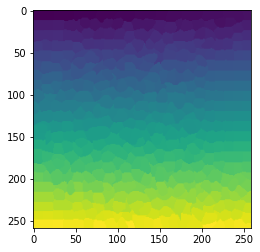

In [108]:
plt.imshow(segments_slic)

In [109]:
N = len(np.unique(segments_slic))
I = filters.threshold_otsu(fimg)
SUB = segments_slic.copy()
for i in range(N):
    sub = segments_slic.copy()
    if np.average(fimg[sub == i]) < I:
        SUB[sub == i] = 0

SUB[SUB!=0]=1
# plt.figure(figsize=(10, 10))
# plt.imshow(SUB)
# plt.show()

THR = np.zeros_like(img)
THR[fimg > I] = 1
# plt.imshow(THR)


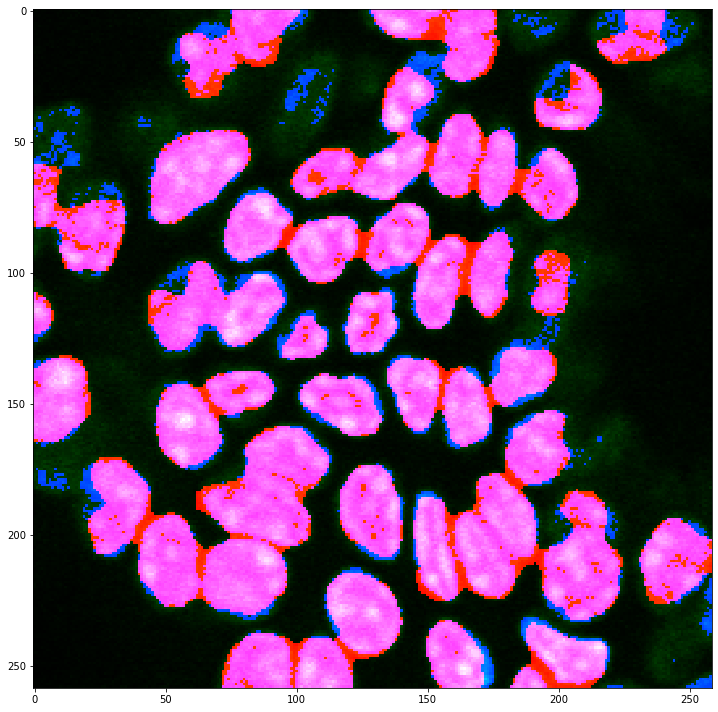

In [110]:
IMAGE = np.zeros([3, img.shape[0], img.shape[1]])
IMAGE[0] = SUB / SUB.max()
IMAGE[1] = img / img.max()
IMAGE[2] = THR / THR.max()
plt.figure(figsize=(10, 10))
io.imshow(IMAGE.transpose([1, 2, 0]))

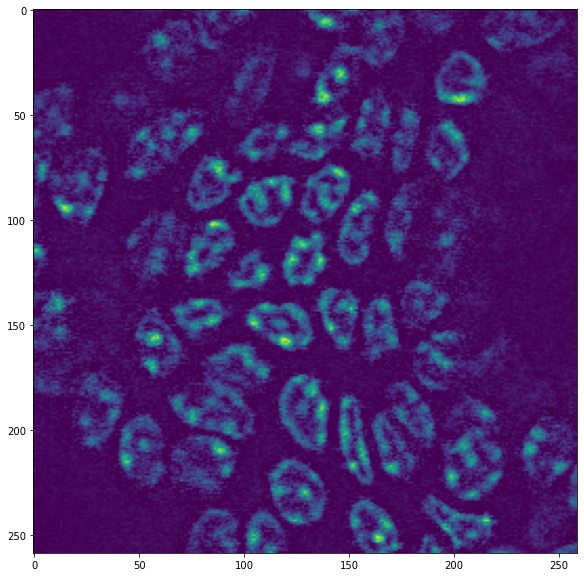

In [71]:
plt.figure(figsize=(10,10))
# plt.imshow(fimg+img)
plt.imshow(morphology.white_tophat(img, disc))